# Dfs0/1/2 Analysis

## Goal

Demonstrate reading in data from DHI MIKE `.dfs0/1/2/` files using `dhitools`

In [2]:
import matplotlib.pyplot as plt

from dhitools import dfs

-------
## Outline

- Read and plot `dfs0` data
- Read and plot `dfs1` data
- Read and plot `dfs2` data
-------


## Input files

In [3]:
dfs0_f = "data/data_ndr_roese.dfs0"
dfs1_f = "data/data_moving_bump.dfs1"
dfs2_f = "data/data_corner.dfs2"

## Dfs0

Read in a `.dfs0` file by parsing the file path to `dfs.Dfs0()`

In [4]:
dfs0 = dfs.Dfs0(dfs0_f)

Print out a file summary

In [5]:
dfs0.summary()

Input file: data/data_ndr_roese.dfs0
Time start = 02/12/1993 00:00:00
Number of timesteps = 7921
Timestep = 120.0
Number of items = 5
Items:
Point 1: Surface elevation, unit = m, index = 0
Point 1: U velocity, unit = m/s, index = 1
Point 1: V velocity, unit = m/s, index = 2
Point 1: Current speed, unit = m/s, index = 3
Point 1: Current direction, unit = deg, index = 4


---------
`dfs0` data read in as a `pandas` `DataFrame` indexed by time where each column is one of the `dfs0` items. This is accessed through the `data` attribute:

In [6]:
dfs0.data.head()

,Point 1: Surface elevation,Point 1: U velocity,Point 1: V velocity,Point 1: Current speed,Point 1: Current direction
1993-12-02 00:00:00,-0.37,0.000000e+00,0.000000e+00,0.000000e+00,90.0
1993-12-02 00:02:00,-0.37,2.529384e-11,2.248478e-10,2.262660e-10,90.0
1993-12-02 00:04:00,-0.37,7.784618e-10,6.727129e-09,6.772020e-09,90.0
1993-12-02 00:06:00,-0.37,5.479619e-09,4.990065e-08,5.020061e-08,90.0
1993-12-02 00:08:00,-0.37,1.955229e-08,2.072845e-07,2.082046e-07,90.0


We can make use of some of the `pandas` `DataFrame` methods to plot the data

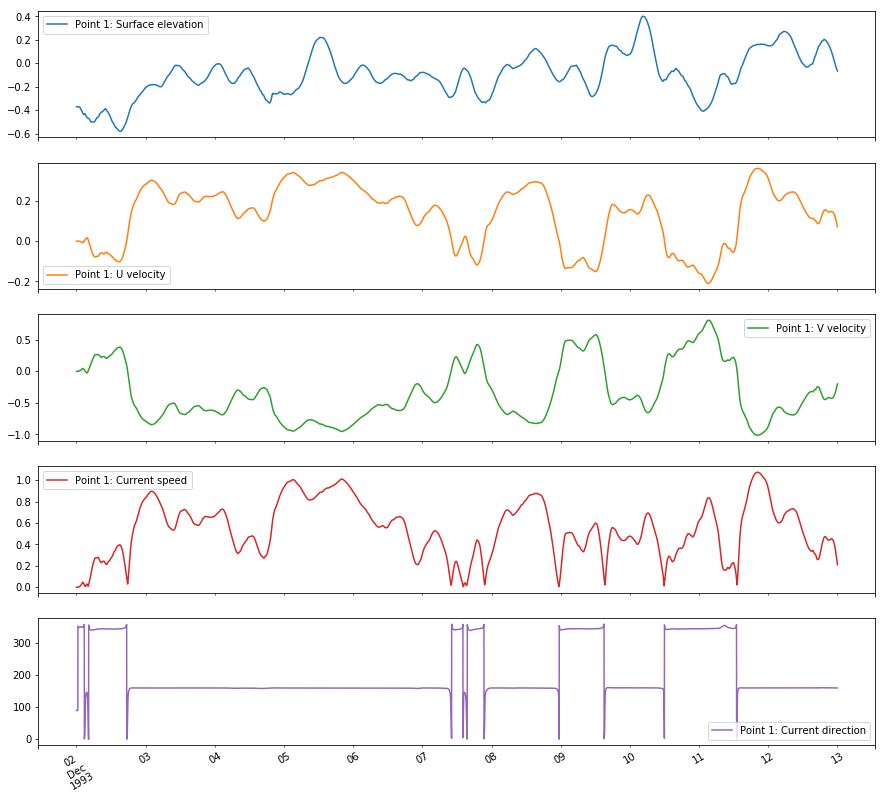

In [7]:
dfs0_ax = dfs0.data.plot(subplots=True, figsize=(15,15), layout=(5,1))
plt.show()

## Dfs1

Read in a `.dfs1` file by parsing the file path to `dfs.dfs1()`

In [8]:
dfs1 = dfs.Dfs1(dfs1_f)

Print out a file summary

In [9]:
dfs1.summary()

Input file: data/data_moving_bump.dfs1
Time start = 01/01/2004 00:00:00
Number of timesteps = 161
Timestep = 0.01
Number of items = 1
number of profile points = 2400
Items:
Concentration - component 1, unit = kg/m^3, index = 0


------------
Since `.dfs1` files create a profile output for each item (variable) accessing the data is different to `dfs0`. We can see that we have one item in the loaded `dfs1` - "Concentration - component 1". To access this call the method `item_data()` with the `item_name` as input

In [10]:
item_name = dfs1.items["names"][0]
concentration_df = dfs1.item_data(item_name)

This returns a `pandas` `DataFrame` for the requested item indexed by time where each column is an output point along the `dfs1` profile.

In [11]:
concentration_df.head()

,0,1,2,3,4,5,6,7,8,9,...,2390,2391,2392,2393,2394,2395,2396,2397,2398,2399
2004-01-01 00:00:00.000,0.012434,0.013513,0.014592,0.015672,0.016751,0.017830,0.018909,0.019988,0.021067,0.023163,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2004-01-01 00:00:00.010,0.000296,0.000637,0.000978,0.001319,0.001659,0.002000,0.002341,0.002682,0.003023,0.004083,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2004-01-01 00:00:00.020,-0.000011,-0.000010,-0.000009,-0.000009,-0.000008,-0.000007,-0.000006,-0.000006,-0.000005,0.000078,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2004-01-01 00:00:00.030,-0.000005,-0.000006,-0.000006,-0.000007,-0.000007,-0.000008,-0.000008,-0.000009,-0.000009,-0.000010,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2004-01-01 00:00:00.040,-0.000002,-0.000003,-0.000003,-0.000003,-0.000004,-0.000004,-0.000004,-0.000005,-0.000005,-0.000003,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Plot a few of the profiles:

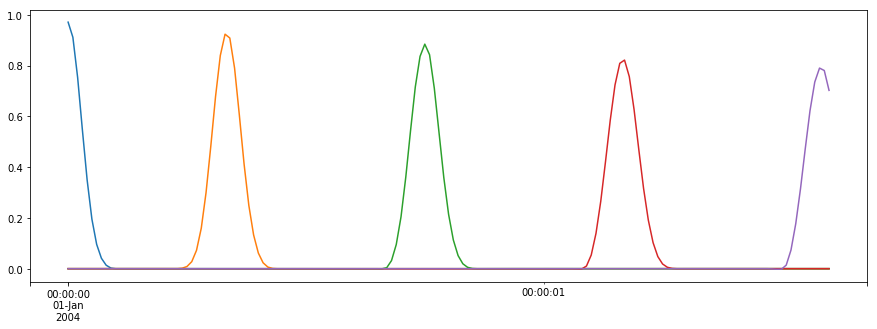

In [12]:
fig, ax = plt.subplots(figsize=(15,5))
concentration_df.plot(y=[100, 500, 1000, 1500, 2000], ax=ax, legend=False)
plt.show()

## Dfs2

Read in a `.dfs2` file by parsing the file path to `dfs.dfs2()`

In [13]:
dfs2 = dfs.Dfs2(dfs2_f)

Print out a file summary

In [14]:
dfs2.summary()

Input file: data/data_corner.dfs2
Time start = 01/01/1990 12:00:00
Number of timesteps = 181
Timestep = 60.0
Number of items = 3

Projection = 
 UTM-31

Grid:
(num_X, num_Y) = (31, 31)
(del_X, del_Y) = (50.0, 50.0)
(X_min, Y_min) = (0.0, 0.0)
(X_max, Y_max) = (1550.0, 1550.0)

Items:
H Water Depth m, unit = m, index = 0
P Flux m^3/s/m, unit = m^3/s/m, index = 1
Q Flux m^3/s/m, unit = m^3/s/m, index = 2


-------
`.dfs2` files are regular gridded data for each item (variable) across a range of timesteps. The summary provides specifications on the grid - `X,Y` step size, shape, min and max - which are also accessible through the `dfs2` class attributes. We can see that there are three different items within the loaded `dfs2`. To acess the data we call the method `item_data()` with the `item_name` as input.

For example, to acess the "H Water Depth" data:

In [15]:
water_depth_name = dfs2.items["names"][0]
water_depth_name

'H Water Depth m'

**Item data for all timesteps:**

If `step_end` = -1, will get read all data from `tstep_start` to end

In [16]:
water_depth_data_all = dfs2.item_data(water_depth_name, tstep_end=-1)

This returns a 3-dimensional array by `(X, Y, time)` - that is the `(X,Y)` gridded data at time `t`

In [17]:
water_depth_data_all.shape

(31, 31, 181)

**Item data for range of timesteps**

In [18]:
water_depth_data_range = dfs2.item_data(water_depth_name, tstep_start=100, tstep_end=120)

In [19]:
water_depth_data_range.shape

(31, 31, 21)

**Item data for single timestep**

In [20]:
water_depth_data_single = dfs2.item_data(water_depth_name, tstep_start=90)

In [21]:
water_depth_data_single.shape

(31, 31, 1)

`dfs2` attributes `X` and `Y` provided `(X,Y)` [numpy.meshgrids](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.meshgrid.html) of the underlying grid so that plotting is straightforward

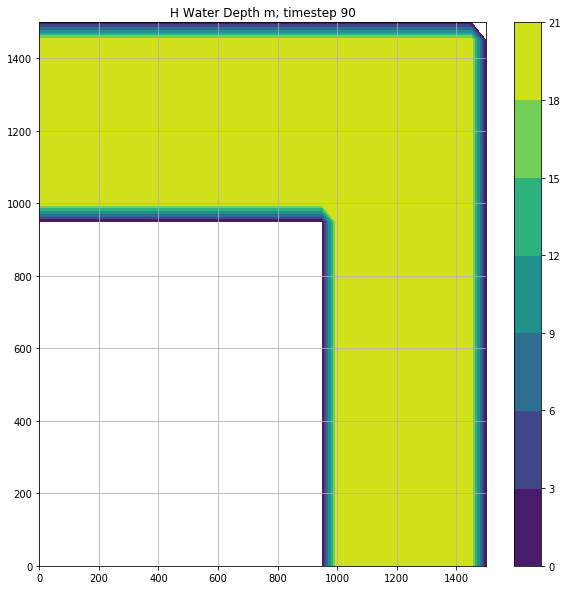

In [22]:
fig, ax = plt.subplots(figsize=(10,10))

cf = ax.contourf(dfs2.X, dfs2.Y, water_depth_data_single[:,:,0])
ax.set_title("{}; timestep 90".format(water_depth_name))
ax.grid()

plt.colorbar(cf)
plt.show()